In [1]:
import pandas as pd

In [8]:
table_a_df = pd.read_csv("./Plots/table_a_rq2.csv")
df_rq3_iterative_pro = pd.read_csv("rq3_iterative_results_pro.csv")
df_rq3_iterative_flash = pd.read_csv("rq3_iterative_results_flash.csv")

In [9]:
df_rq3_iterative_pro

,Unnamed: 0,rq3_pro_final_yaml,rq3_pro_history,rq3_pro_passes,rq3_pro_iters_used
0,0,name: Validate Code Snippets\n\non:\n push:\n...,"{""index"": 0, ""iteration"": 1, ""yaml_iterations""...","{1: {'index': 0, 'iteration': 1, 'yaml_iterati...",1.0
1,1,name: Generate E-books\n\non:\n pull_request:...,"{""index"": 1, ""iteration"": 1, ""yaml_iterations""...","[{1: {'index': 1, 'iteration': 1, 'yaml_iterat...",1.0
2,2,name: Create Release\n\non:\n push:\n tags...,"{""index"": 2, ""iteration"": 1, ""yaml_iterations""...","[{1: {'index': 2, 'iteration': 1, 'yaml_iterat...",1.0
3,3,name: Add Base Branch Label\non:\n pull_reque...,"{""index"": 3, ""iteration"": 1, ""yaml_iterations""...","[{1: {'index': 3, 'iteration': 1, 'yaml_iterat...",1.0
4,4,name: Create Release and Upload Assets\n\non:\...,"{""index"": 4, ""iteration"": 1, ""yaml_iterations""...","[{1: {'index': 4, 'iteration': 1, 'yaml_iterat...",1.0
...,...,...,...,...,...
3883,3883,name: CI\n\non:\n push:\n pull_request:\n\nc...,"{""index"": 3883, ""iteration"": 1, ""yaml_iteratio...","[{1: {'index': 3883, 'iteration': 1, 'yaml_ite...",1.0
3884,3884,name: CodeQL\non:\n push:\n branches: [ ma...,"{""index"": 3884, ""iteration"": 1, ""yaml_iteratio...","[{1: {'index': 3884, 'iteration': 1, 'yaml_ite...",1.0
3885,3885,name: Test Java 17\n\non:\n push:\n branch...,"{""index"": 3885, ""iteration"": 1, ""yaml_iteratio...","[{1: {'index': 3885, 'iteration': 1, 'yaml_ite...",1.0
3886,3886,name: Test Java 21\n\non:\n push:\n branch...,"{""index"": 3886, ""iteration"": 1, ""yaml_iteratio...","[{1: {'index': 3886, 'iteration': 1, 'yaml_ite...",1.0


In [18]:
import pandas as pd
import json

df = pd.read_csv("rq3_iterative_results_pro.csv")
df = df.rename(columns={"Unnamed: 0": "workflow_id"})

rows = []

for _, row in df.iterrows():
    workflow_id = row["workflow_id"]
    history = row["rq3_pro_history"]

    # Parse JSON if needed
    if isinstance(history, str):
        history = json.loads(history)

    # Case 1: single iteration dict
    if "iteration" in history:
        history = {history["iteration"]: history}

    # Case 2: list containing dict
    if isinstance(history, list):
        history = history[0]

    # Now history is always: { iteration_number -> iter_data }
    for iter_data in history.values():
        rows.append({
            "workflow_id": workflow_id,
            "model": "pro",
            "iteration": iter_data["iteration"],
            "passes_actionlint": iter_data["exit_code"] == 0,
            "n_errors": iter_data["n_diag"],
            "lint_time_sec": iter_data.get("lint_time_sec"),
        })

rq3_long = pd.DataFrame(rows)


In [19]:
rq3_long

,workflow_id,model,iteration,passes_actionlint,n_errors,lint_time_sec
0,0,pro,1,True,0,0.707789
1,1,pro,1,True,0,0.708648
2,2,pro,1,True,0,0.711791
3,3,pro,1,True,0,0.701813
4,4,pro,1,True,0,0.673983
...,...,...,...,...,...,...
3883,3883,pro,1,True,0,0.611329
3884,3884,pro,1,True,0,0.628424
3885,3885,pro,1,True,0,0.642995
3886,3886,pro,1,True,0,0.625060


In [25]:
# rq3_long.head()
# rq3_long.columns
rq3_long.groupby("iteration")["passes_actionlint"].mean()
# rq3_long.groupby("iteration")["n_errors"].median()


iteration
1    1.00
2    1.00
3    1.00
4    1.00
5    0.06
Name: passes_actionlint, dtype: float64

Flash

In [27]:
import pandas as pd
import json

df = pd.read_csv("rq3_iterative_results_flash.csv")
df = df.rename(columns={"Unnamed: 0": "workflow_id"})

rows = []

for _, row in df.iterrows():
    workflow_id = row["workflow_id"]
    history = row["rq3_flash_history"]

    # Parse JSON if needed
    if isinstance(history, str):
        history = json.loads(history)

    # Case 1: single iteration dict
    if "iteration" in history:
        history = {history["iteration"]: history}

    # Case 2: list containing dict
    if isinstance(history, list):
        history = history[0]

    # Now history is always: { iteration_number -> iter_data }
    for iter_data in history.values():
        rows.append({
            "workflow_id": workflow_id,
            "model": "flash",
            "iteration": iter_data["iteration"],
            "passes_actionlint": iter_data["exit_code"] == 0,
            "n_errors": iter_data["n_diag"],
            "lint_time_sec": iter_data.get("lint_time_sec"),
        })

rq3_flash = pd.DataFrame(rows)


In [28]:
rq3_flash

,workflow_id,model,iteration,passes_actionlint,n_errors,lint_time_sec
0,0,flash,1,True,0,0.725961
1,1,flash,1,True,0,0.711850
2,2,flash,2,True,0,1.804341
3,3,flash,1,True,0,1.516695
4,4,flash,1,True,0,1.418232
...,...,...,...,...,...,...
3883,3883,flash,1,True,0,0.771758
3884,3884,flash,1,True,0,0.681635
3885,3885,flash,1,True,0,0.692434
3886,3886,flash,1,True,0,0.735868


In [30]:
rq3_long_concat = pd.concat([rq3_long, rq3_flash], ignore_index=True)
rq3_long_concat

,workflow_id,model,iteration,passes_actionlint,n_errors,lint_time_sec
0,0,pro,1,True,0,0.707789
1,1,pro,1,True,0,0.708648
2,2,pro,1,True,0,0.711791
3,3,pro,1,True,0,0.701813
4,4,pro,1,True,0,0.673983
...,...,...,...,...,...,...
7771,3883,flash,1,True,0,0.771758
7772,3884,flash,1,True,0,0.681635
7773,3885,flash,1,True,0,0.692434
7774,3886,flash,1,True,0,0.735868


In [32]:
rq3_long_concat["model"].value_counts()

pro      3888
flash    3888
Name: model, dtype: int64

In [36]:
rq3_pass_iter = (
    rq3_long_concat
    .groupby(["model", "iteration"])["passes_actionlint"]
    .mean()
    .reset_index()
)


In [37]:
rq3_long_concat.groupby(["model", "iteration"])["n_errors"].median()


model  iteration
flash  1            0.0
       2            0.0
       3            0.0
       4            0.0
       5            1.0
pro    1            0.0
       2            0.0
       3            0.0
       4            0.0
       5            1.0
Name: n_errors, dtype: float64

In [38]:
rq3_convergence = (
    rq3_long_concat[rq3_long_concat["passes_actionlint"]]
    .groupby(["workflow_id", "model"])["iteration"]
    .min()
    .reset_index(name="first_valid_iteration")
)


Plots

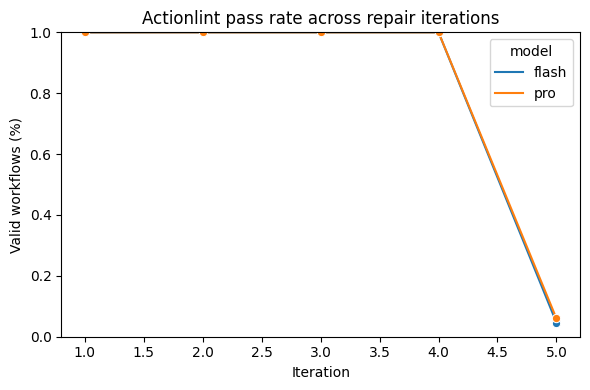

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

pass_rate_iter = (
    rq3_long_concat
    .groupby(["model", "iteration"])["passes_actionlint"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(6,4))
sns.lineplot(
    data=pass_rate_iter,
    x="iteration",
    y="passes_actionlint",
    hue="model",
    marker="o"
)

plt.ylabel("Valid workflows (%)")
plt.xlabel("Iteration")
plt.ylim(0, 1)
plt.title("Actionlint pass rate across repair iterations")
plt.tight_layout()
plt.show()


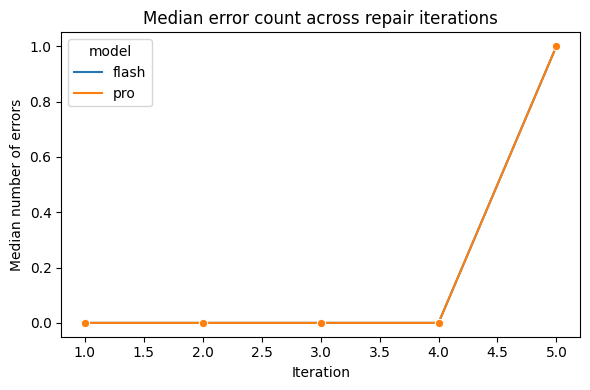

In [43]:
err_median = (
    rq3_long_concat
    .groupby(["model", "iteration"])["n_errors"]
    .median()
    .reset_index()
)

plt.figure(figsize=(6,4))
sns.lineplot(
    data=err_median,
    x="iteration",
    y="n_errors",
    hue="model",
    marker="o"
)

plt.ylabel("Median number of errors")
plt.xlabel("Iteration")
plt.title("Median error count across repair iterations")
plt.tight_layout()
plt.show()


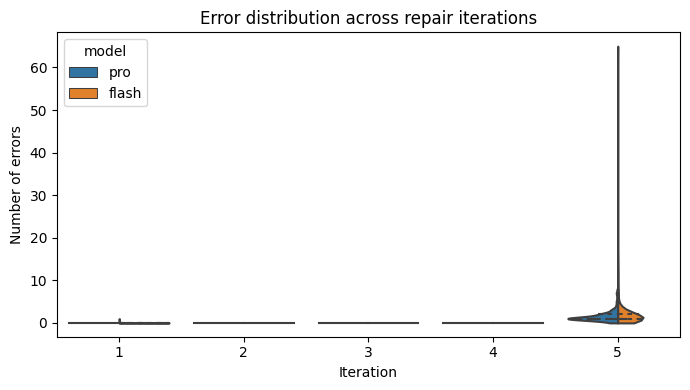

In [44]:
plt.figure(figsize=(7,4))
sns.violinplot(
    data=rq3_long_concat,
    x="iteration",
    y="n_errors",
    hue="model",
    split=True,
    inner="quartile",
    cut=0
)

plt.ylabel("Number of errors")
plt.xlabel("Iteration")
plt.title("Error distribution across repair iterations")
plt.tight_layout()
plt.show()


In [50]:
fixed

,workflow_id,model,iteration,level_3,became_valid
0,0,flash,1,3888,True
1,0,pro,1,0,True
2,1,flash,1,3889,True
3,1,pro,1,1,True
4,2,flash,2,3890,True
...,...,...,...,...,...
7771,3885,pro,1,3885,True
7772,3886,flash,1,7774,True
7773,3886,pro,1,3886,True
7774,3887,flash,1,7775,True


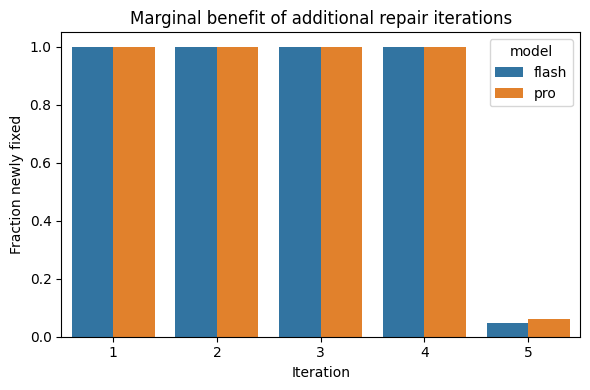

In [49]:
import pandas as pd

fixed = (
    rq3_long_concat
    .sort_values(["workflow_id", "iteration"])
    .groupby(["workflow_id", "model", "iteration"])
    .apply(
        lambda df: df["passes_actionlint"].diff().fillna(df["passes_actionlint"])
    )
    .reset_index(name="became_valid")
)

fixed_rate = (
    fixed
    .groupby(["model", "iteration"])["became_valid"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(
    data=fixed_rate,
    x="iteration",
    y="became_valid",
    hue="model"
)

plt.ylabel("Fraction newly fixed")
plt.xlabel("Iteration")
plt.title("Marginal benefit of additional repair iterations")
plt.tight_layout()
plt.show()


In [60]:
# rq3_long_concat.to_csv("rq3_long_concat.csv", index=False)
rq3_long_concat

,workflow_id,model,iteration,passes_actionlint,n_errors,lint_time_sec
0,0,pro,1,True,0,0.707789
1,1,pro,1,True,0,0.708648
2,2,pro,1,True,0,0.711791
3,3,pro,1,True,0,0.701813
4,4,pro,1,True,0,0.673983
...,...,...,...,...,...,...
7771,3883,flash,1,True,0,0.771758
7772,3884,flash,1,True,0,0.681635
7773,3885,flash,1,True,0,0.692434
7774,3886,flash,1,True,0,0.735868


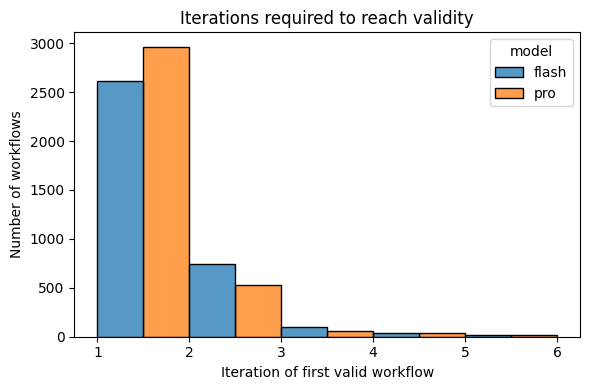

In [51]:
first_success = (
    rq3_long_concat[rq3_long_concat["passes_actionlint"]]
    .groupby(["workflow_id", "model"])["iteration"]
    .min()
    .reset_index()
)

plt.figure(figsize=(6,4))
sns.histplot(
    data=first_success,
    x="iteration",
    hue="model",
    multiple="dodge",
    bins=range(1, first_success["iteration"].max()+2)
)

plt.xlabel("Iteration of first valid workflow")
plt.ylabel("Number of workflows")
plt.title("Iterations required to reach validity")
plt.tight_layout()
plt.show()


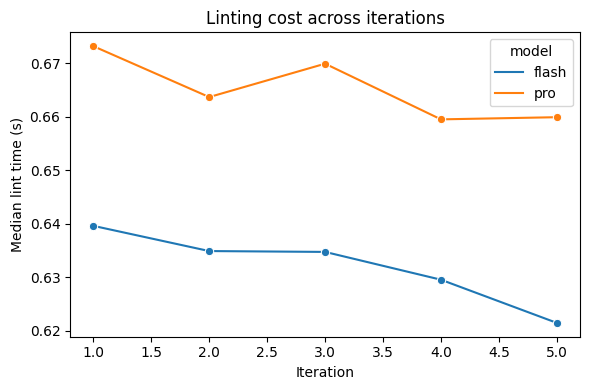

In [53]:
time_stats = (
    rq3_long_concat
    .groupby(["model", "iteration"])["lint_time_sec"]
    .median()
    .reset_index()
)

plt.figure(figsize=(6,4))
sns.lineplot(
    data=time_stats,
    x="iteration",
    y="lint_time_sec",
    hue="model",
    marker="o"
)

plt.ylabel("Median lint time (s)")
plt.xlabel("Iteration")
plt.title("Linting cost across iterations")
plt.tight_layout()
plt.show()


Analysis

In [75]:
rq3_long_concat

,workflow_id,model,iteration,passes_actionlint,n_errors,lint_time_sec
0,0,pro,1,True,0,0.707789
1,1,pro,1,True,0,0.708648
2,2,pro,1,True,0,0.711791
3,3,pro,1,True,0,0.701813
4,4,pro,1,True,0,0.673983
...,...,...,...,...,...,...
7771,3883,flash,1,True,0,0.771758
7772,3884,flash,1,True,0,0.681635
7773,3885,flash,1,True,0,0.692434
7774,3886,flash,1,True,0,0.735868


In [64]:
df

,workflow_id,model,iteration,passes_actionlint,n_errors,lint_time_sec
0,0,pro,1,True,0,0.707789
1,1,pro,1,True,0,0.708648
2,2,pro,1,True,0,0.711791
3,3,pro,1,True,0,0.701813
4,4,pro,1,True,0,0.673983
...,...,...,...,...,...,...
7771,3883,flash,1,True,0,0.771758
7772,3884,flash,1,True,0,0.681635
7773,3885,flash,1,True,0,0.692434
7774,3886,flash,1,True,0,0.735868


In [65]:
import pandas as pd

df = pd.read_csv("./Plots/rq3_long_concat.csv")

# Keep only whether each workflow ever passes by iteration K
K = 5

pass_at_k = (
    df[df["iteration"] <= K]
    .groupby(["model", "workflow_id"])["passes_actionlint"]
    .any()
    .reset_index()
    .groupby("model")["passes_actionlint"]
    .mean()
    .reset_index(name=f"Pass@{K}")
)

pass_at_k


,model,Pass@5
0,flash,0.905093
1,pro,0.927469


In [67]:
pass_by_iter = (
    df
    .groupby(["model", "iteration"])["passes_actionlint"]
    .mean()
    .reset_index()
)
pass_by_iter

,model,iteration,passes_actionlint
0,flash,1,0.999618
1,flash,2,1.000000
2,flash,3,1.000000
3,flash,4,1.000000
4,flash,5,0.046632
5,pro,1,1.000000
6,pro,2,1.000000
7,pro,3,1.000000
8,pro,4,1.000000
9,pro,5,0.060000


<Axes: >

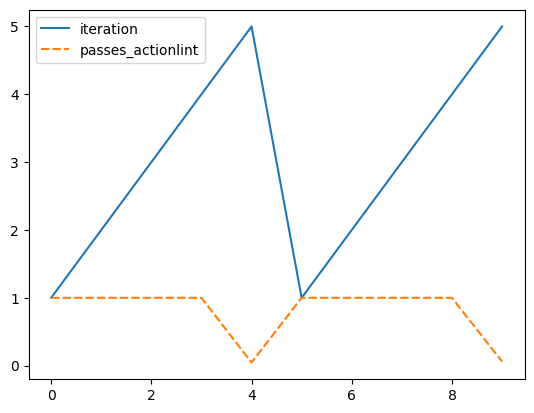

In [74]:
first_success = (
    df[df["passes_actionlint"]]
    .groupby(["model", "workflow_id"])["iteration"]
    .min()
    .reset_index()
)
first_success

sns.lineplot(
    data=pass_by_iter)